**NOTE: Turn on 64bit values to avoid underflow during CA execution.**

In [1]:
from jax.config import config
config.update("jax_debug_nans", True)
config.update("jax_enable_x64", True)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import jax
import jax.numpy as jnp
from functools import partial

In [3]:
import jax_ca_utils as ca

## CA Runner

This utility function runs the CA for a binary CA rule (using the Wolfram numbering system). To allow the use of log probabilities a small pertubation is applied to probablities of the rule.

In [4]:
def run(
    rule: int, 
    width: int, 
    steps: int, 
    log_prob: bool = True, 
    pertubation: float = 1e-15,
    seed: int = 101,
):
    # Create CA rule with small pertubation 
    # from 0-1 values
    r = ca.ca.rule_arr(
        rule, 
        idxs=tuple(np.arange(8)), 
        perbs=tuple(pertubation * np.ones(8))
    )
    
    # Convert rule to log joint probabilities
    j = jnp.log(ca.rule_to_joint(r, log_prob=False))
    
    # Create random initial state
    rng = np.random.default_rng(seed=seed)
    rand_probs = rng.uniform(
        pertubation, 1-pertubation, (2, width)
    )
    
    s_test = ca.state_to_joint(rand_probs)
    s_test = np.log(s_test)
    
    # Run model and return time-series
    return ca.run_model(j, s_test, steps, log_prob=log_prob)

## Visualisation

Here we visualise the entriopy time-series of some of the interesting rules.

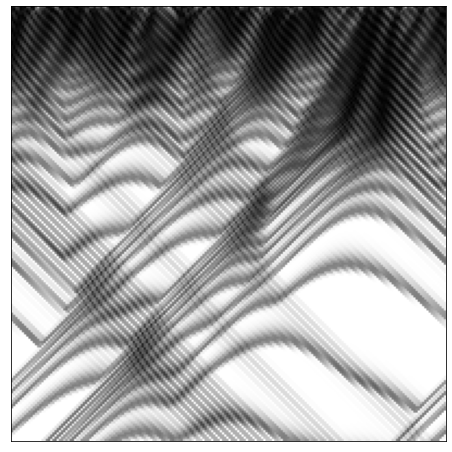

In [5]:
f, ax = plt.subplots(figsize=(8, 8))
ax.imshow(ca.entropy(run(14, 200, 200)), cmap='gray')
ax.set_xticks([])
ax.set_yticks([]);

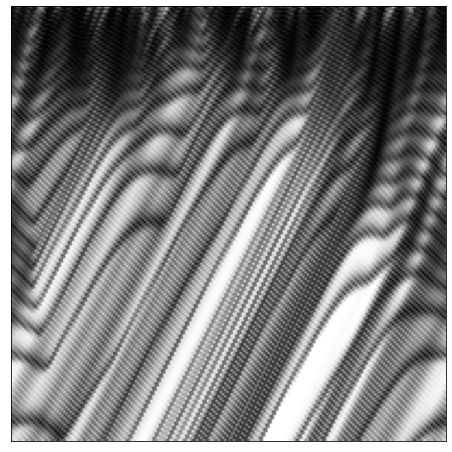

In [6]:
f, ax = plt.subplots(figsize=(8, 8))
ax.imshow(ca.entropy(run(35, 200, 200)), cmap='gray')
ax.set_xticks([])
ax.set_yticks([]);

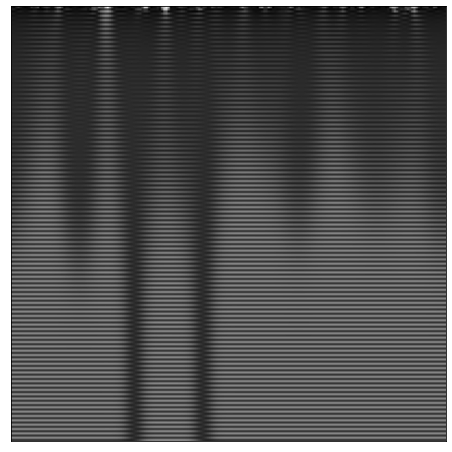

In [7]:
f, ax = plt.subplots(figsize=(8, 8))
ax.imshow(ca.entropy(run(37, 200, 200)), cmap='gray')
ax.set_xticks([])
ax.set_yticks([]);